In [50]:
from datetime import datetime
import pandas as pd
from matplotlib import pyplot as plt


# read in the data under data/in-use/unscaled_train_data.csv

day = pd.read_csv('../data/clean/trading_prices_01102018_01012023.csv')
day['DateTime'] = pd.to_datetime(day['Date'] + ' ' + day['Start'], format='%d.%m.%Y %H:%M')
day.sort_values(by='DateTime', inplace=True)


In [51]:
start_time = datetime(2018, 10, 1, 0, 0)
end_time = datetime(2018, 10, 1, 23, 59)

In [52]:
mask = (day['DateTime'] > start_time) & (day['DateTime'] <= end_time)
day = day.loc[mask]

In [53]:
target_col = 'Deutschland/Luxemburg [€/MWh] Original resolutions'
day[target_col] = day[target_col].str.replace(',', '.').astype(float)
day["Time"] = day["DateTime"].dt.strftime("%H:%M")

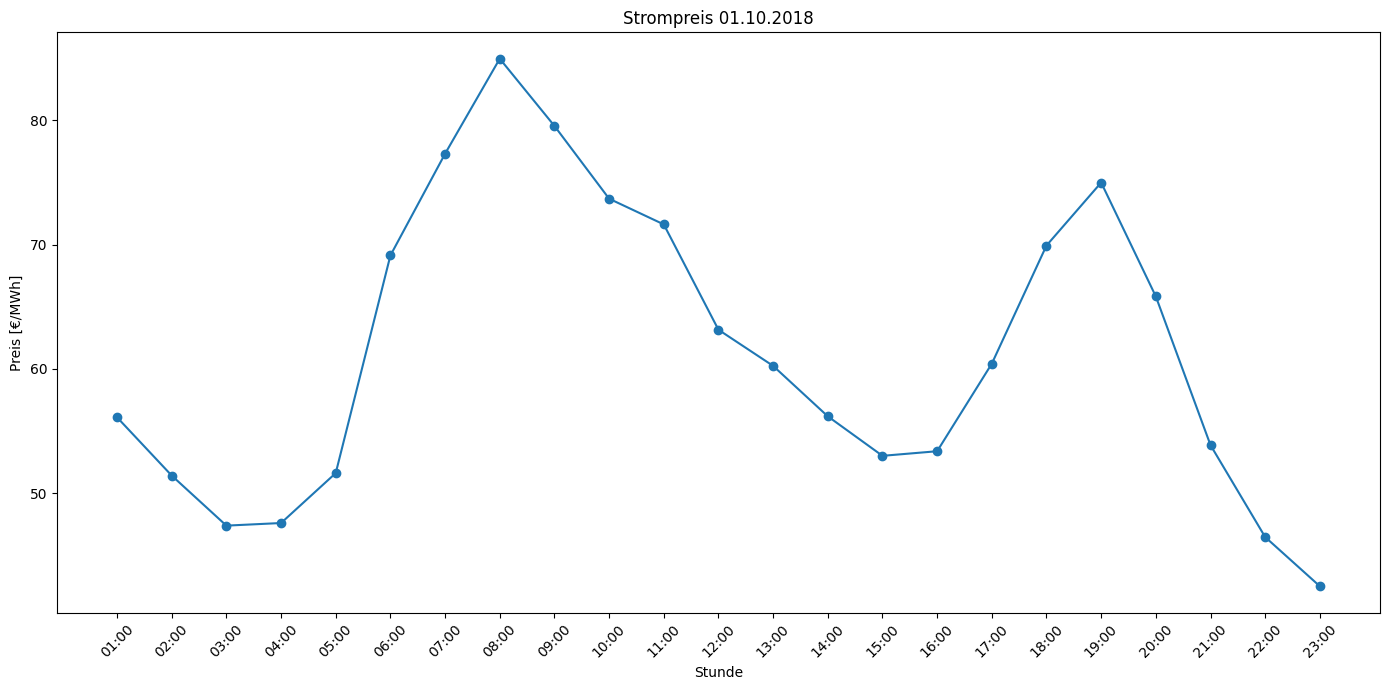

In [54]:
plt.figure(figsize=(14, 7))
plt.plot(day['Time'], day[target_col], marker='o')
plt.title('Strompreis 01.10.2018')
plt.xlabel('Stunde')
plt.ylabel('Preis [€/MWh]')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of datetime labels
plt.savefig('../plots/price_01_10_2018.svg', format='svg', dpi=1200)
plt.show()